# ATM returns based on DMS classification

In [11]:
import numpy as np
from scipy.interpolate import griddata
from osgeo import gdal, osr
import matplotlib.pyplot as plt
#import cartopy.crs as ccrs

def pixel2coord(im):
    c,a,b,f,d,e= im.GetGeoTransform()
    
    red = im.GetRasterBand(1).ReadAsArray()
    
    col =np.zeros((len(red[0]),len(red[1])))
    row=col
    for i in range(len(col[0])):
        col[:,i]=i
    for j in range(len(row[1])):
        row[j,:]=j
    xp = a * col + b * row + a * 0.5 + b * 0.5 + c
    yp = d * col + e * row + d * 0.5 + e * 0.5 + f
    
    return xp,yp

### Import DMS classified matrix and ATM data

In [14]:
DMS_path= '/Users/ellenbuckley/Documents/UMD/research/ANALYSIS/DMS/DMS_1752406_02256_20170725_13041470.tif'
#ATM_path=

im= gdal.Open(DMS_path)
#red = im.GetRasterBand(1).ReadAsArray()
#im.GetGeoTransform()
xp, yp = pixel2coord(im)

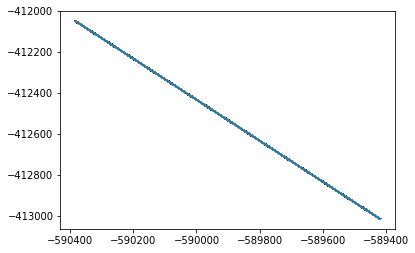

In [25]:
plt.plot(xp,yp);

### Interpolate where the ATM footprint falls within the DMS image

In [ ]:
points= np.columnstack((np.ravel(xp), np.ravel(yp)))
values=np.ravel(classif)
grid_z0 = griddata(points, values, (lon, lat), method='nearest')